In [2]:
import pandas as pds
import statistics
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings(action='ignore')

#Other additional imports
warnings.filterwarnings('ignore') 

In [3]:
spam=pds.read_csv('spam.csv') #to read the csv file
spam

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.101,0.0,0.000,0.000,0.00,1.857,16,52,ham
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.443,0.0,0.221,0.665,0.00,3.812,15,61,spam
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.000,1,3,ham
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.218,0.0,0.218,0.000,0.00,1.687,10,27,ham


In [4]:
y=spam['Class'] #to access output column seperately
X = spam.drop('Class', 1)

In [5]:
# to split the data for training and testing the module

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.75)

In [6]:
print(spam.shape,y.shape)

(4601, 58) (4601,)


In [34]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = KNeighborsClassifier(n_neighbors=5)
eclf1 = VotingClassifier(estimators=[('logistic', clf1), ('Random', clf2), ('KNN', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train,y_train)
acc = eclf1.score(X_test,y_test)*100
print('Accuracy level' ,acc)

Accuracy level 94.78827361563518


In [35]:
y_predict2 = eclf1.predict(X_test)
confusion_matrix(y_test, y_predict2)
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

         ham       0.95      0.97      0.96       556
        spam       0.95      0.92      0.93       365

    accuracy                           0.95       921
   macro avg       0.95      0.94      0.95       921
weighted avg       0.95      0.95      0.95       921



In [33]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
adaboo_clf_dt = AdaBoostClassifier(decision_tree,n_estimators=500)
adaboo_clf_dt.fit(X_train, y_train)
acc2 = adaboo_clf_dt.score(X_test,y_test)
acc2*100

95.00542888165037

In [18]:
y_predict2 = adaboo_clf_dt.predict(X_test)
confusion_matrix(y_test, y_predict2)
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

         ham       0.95      0.96      0.95       556
        spam       0.94      0.92      0.93       365

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921



### Study the impact of training sample size on the accuracies of the fused classifier and the AdaBoost Ensemble with Decision Tree as the base learner. Compare their accuracies with the following training-test splits: 50%-50%, 60%-40%, 70%-30%, and 80%-20%. Report your observations/conclusions and provide evidence to support your conclusions. [50 points]

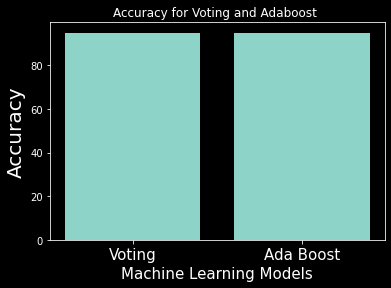

In [38]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Voting', 'Ada Boost']
acc_info = [
    acc,
    acc2*100,
]
index = np.arange(len(model))
plt.bar(index, acc_info)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(index, model, fontsize=15 )
plt.title('Accuracy for Voting and Adaboost ')
plt.show()

In [11]:
#Train data size in precentage
split = [0.5, 0.6, 0.7, 0.8]
vcd = []
adaboo = []
predict_vc = []
predict_adaboo = []
#Creating variable for Multiple algorithms in Voting Classifier 
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = KNeighborsClassifier(n_neighbors=5)
eclf1 = VotingClassifier(estimators=[('logistic', clf1), ('Random', clf2), ('KNN', clf3)], voting='hard')

#perform AdaBoostClassifier algorithm and save it in variable
decision_tree = tree.DecisionTreeClassifier()
adaboo_clf_dt = AdaBoostClassifier(decision_tree,n_estimators=500)

#Test site size
for i in split:
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=i)
    #perform the algorithmic training
    for n in range(10):
        eclf1 = eclf1.fit(X_train,y_train)
        score_accu = eclf1.score(X_test,y_test)
        score_accu
        predict_vc.append(eclf1.predict(X_test)) 
        vcd.append(score_accu)

        adaboo_clf_dt.fit(X_train, y_train)
        acc2 = adaboo_clf_dt.score(X_test,y_test)
        predict_adaboo.append(adaboo_clf_dt.predict(X_test)) 
        adaboo.append(acc2)

print('VotingClassifier',vcd)
print('ada boost',adaboo)

VotingClassifier [0.9287266405910474, 0.9287266405910474, 0.9287266405910474, 0.9287266405910474, 0.9287266405910474, 0.9287266405910474, 0.9287266405910474, 0.9287266405910474, 0.9287266405910474, 0.9287266405910474, 0.9445953286257469, 0.9445953286257469, 0.9445953286257469, 0.9445953286257469, 0.9445953286257469, 0.9445953286257469, 0.9445953286257469, 0.9445953286257469, 0.9445953286257469, 0.9445953286257469, 0.942795076031861, 0.942795076031861, 0.942795076031861, 0.942795076031861, 0.942795076031861, 0.942795076031861, 0.942795076031861, 0.942795076031861, 0.942795076031861, 0.942795076031861, 0.9478827361563518, 0.9478827361563518, 0.9478827361563518, 0.9478827361563518, 0.9478827361563518, 0.9478827361563518, 0.9478827361563518, 0.9478827361563518, 0.9478827361563518, 0.9478827361563518]
ada boost [0.9352455454150369, 0.9421990438939591, 0.9343763581051716, 0.9361147327249022, 0.940026075619296, 0.9469795740982182, 0.9478487614080835, 0.9287266405910474, 0.9413298565840938, 0.

In [31]:
print('''----------------------------------- Voting Classifier -------------------------------------''')
numScore=len(vcd)
total_VC_Score=sum(vcd)
avgvcd = float(total_VC_Score/numScore)
acc_vcd = avgvcd*100
print("Mean rain score: ",avgvcd)
print("Standard Deviation of score: ",statistics.stdev(vcd))
print("Maximum rain score: ",max(vcd))
print("Minimum rain score: ",min(vcd), "\n")



print('''----------------------------------- AdaBoost Classifier -------------------------------------''')
numScore=len(adaboo)
total_adaboo_Score=sum(adaboo)
avgadaboo = float(total_adaboo_Score/numScore)
acc_adaboo = avgadaboo*100
print("Mean rain score: ",avgadaboo)
print("Standard Deviation of score: ",statistics.stdev(adaboo))
print("Maximum rain score: ",max(adaboo))
print("Minimum rain score: ",min(adaboo), "\n")


----------------------------------- Voting Classifier -------------------------------------
Mean rain score:  0.9409999453512518
Standard Deviation of score:  0.007410250939634991
Maximum rain score:  0.9478827361563518
Minimum rain score:  0.9287266405910474 

----------------------------------- AdaBoost Classifier -------------------------------------
Mean rain score:  0.9344808394498573
Standard Deviation of score:  0.0166853059790035
Maximum rain score:  0.9543973941368078
Minimum rain score:  0.9000724112961622 



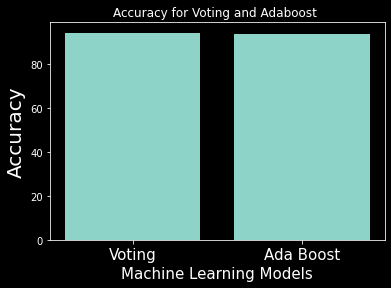

In [32]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Voting', 'Ada Boost']
acc_info = [
    acc_vcd,
    acc_adaboo,
]
index = np.arange(len(model))
plt.bar(index, acc_info)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(index, model, fontsize=15 )
plt.title('Accuracy for Voting and Adaboost ')
plt.show()